<a href="https://colab.research.google.com/github/bomij33/With-GANADA/blob/bomi/code/audio_classification_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow 버전 다운로드 2.8.0

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220719082949.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220719082949


In [ ]:
!pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 17 kB/s 
     |████████████████████████████████| 462 kB 4.3 MB/s 


In [ ]:
# restart 후 확인
import tensorflow as tf
print(tf.__version__)

2.8.0


# 데이터 로딩

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import IPython
import librosa
SAMPLING_RATE = 22050

In [12]:
import glob

file_list = glob.glob("/gdrive/MyDrive/Audio/B/*.wav")  # 공유 드라이브의 B단계 음성 파일
print(len(file_list))
print(file_list[:3]) 

1204
['/gdrive/MyDrive/Audio/B/01_217.wav', '/gdrive/MyDrive/Audio/B/01_218.wav', '/gdrive/MyDrive/Audio/B/01_219.wav']


In [13]:
def load_wav(file_name):
    data, _ = librosa.load(file_name, sr=SAMPLING_RATE)
    return data

raw_x = [] # data
raw_y = [] # label
for file_name in file_list:
    label = int(file_name.split("/")[-1].split("_")[0])  # 파일명을 /로 구분하여 스필릿, 다시 _로 스플릿
    # label = file_name.split("/")[-1].split("_")[0]

    print(file_name, label)
    data = load_wav(file_name)
    raw_x.append(data)
    raw_y.append(label)


/gdrive/MyDrive/Audio/B/01_217.wav 1
/gdrive/MyDrive/Audio/B/01_218.wav 1
/gdrive/MyDrive/Audio/B/01_219.wav 1
/gdrive/MyDrive/Audio/B/01_220.wav 1
/gdrive/MyDrive/Audio/B/01_221.wav 1
/gdrive/MyDrive/Audio/B/01_222.wav 1
/gdrive/MyDrive/Audio/B/01_223.wav 1
/gdrive/MyDrive/Audio/B/01_224.wav 1
/gdrive/MyDrive/Audio/B/01_225.wav 1
/gdrive/MyDrive/Audio/B/01_226.wav 1
/gdrive/MyDrive/Audio/B/01_227.wav 1
/gdrive/MyDrive/Audio/B/01_228.wav 1
/gdrive/MyDrive/Audio/B/01_229.wav 1
/gdrive/MyDrive/Audio/B/01_230.wav 1
/gdrive/MyDrive/Audio/B/01_231.wav 1
/gdrive/MyDrive/Audio/B/01_232.wav 1
/gdrive/MyDrive/Audio/B/01_233.wav 1
/gdrive/MyDrive/Audio/B/01_234.wav 1
/gdrive/MyDrive/Audio/B/01_235.wav 1
/gdrive/MyDrive/Audio/B/01_236.wav 1
/gdrive/MyDrive/Audio/B/01_237.wav 1
/gdrive/MyDrive/Audio/B/01_238.wav 1
/gdrive/MyDrive/Audio/B/01_239.wav 1
/gdrive/MyDrive/Audio/B/01_240.wav 1
/gdrive/MyDrive/Audio/B/01_241.wav 1
/gdrive/MyDrive/Audio/B/01_242.wav 1
/gdrive/MyDrive/Audio/B/01_243.wav 1
/

In [14]:
from collections import Counter
Counter(raw_y)


Counter({1: 397, 2: 409, 0: 398})

In [14]:
print(raw_y[980])
IPython.display.Audio(raw_x[980], rate=SAMPLING_RATE)

3


In [15]:
print(raw_y[1])
IPython.display.Audio(raw_x[1], rate=SAMPLING_RATE)

0


# padding

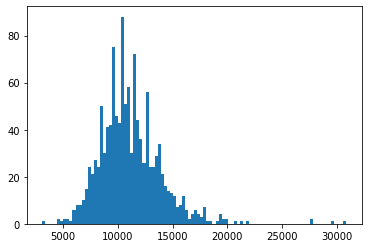

In [15]:
lens = []
for i in range(len(raw_x)):
    lens.append(len(raw_x[i]))

plt.hist(lens, bins=100)
plt.show()

In [17]:
print(lens[:10])

[11025, 11466, 11466, 16758, 7497, 10584, 11025, 10584, 10805, 9702]


In [16]:
from tensorflow.keras.preprocessing import sequence

padded_raw_x = sequence.pad_sequences(raw_x, maxlen=22050, padding='post', dtype=float)
# 파일 길이를 똑같이 맞춤 22050 (1초로)

In [22]:
print(raw_y[670])
IPython.display.Audio(raw_x[670], rate=SAMPLING_RATE)

2


In [23]:
print(raw_y[340])
IPython.display.Audio(raw_x[340], rate=SAMPLING_RATE)

1


In [17]:
raw_x = np.array(padded_raw_x)
raw_y = np.array(raw_y)
print(raw_x.shape)  
print(raw_y.shape)

(1204, 22050)
(1204,)


In [10]:
print(raw_y[980])
IPython.display.Audio(raw_x[980], rate=SAMPLING_RATE)

3


In [11]:
print(raw_y[1])
IPython.display.Audio(raw_x[1], rate=SAMPLING_RATE)

1


# Normalization

In [18]:
max = np.max(raw_x)
min = np.min(raw_x)
print(min, max)

-0.9981107711791992 1.1331255435943604


In [ ]:
# raw_x = (raw_x - min) / (max - min)

# 2차원으로 reshape

In [19]:
print(raw_x.shape)
raw_x = raw_x.reshape((len(raw_x),-1,1))
print(raw_x.shape)

(1204, 22050)
(1204, 22050, 1)


# 데이터 분리

In [20]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(raw_x, raw_y, test_size=0.2, shuffle=True)

In [21]:
print(len(train_y))
print(train_y[len(train_y)-1])
IPython.display.Audio(train_x[len(train_y)-1].squeeze(), rate=SAMPLING_RATE)

963
0


In [22]:
print(train_y[1])
IPython.display.Audio(train_x[1].squeeze(), rate=SAMPLING_RATE)

2


In [23]:
print(train_x.shape)
print(train_y.shape)


(963, 22050, 1)
(963,)


In [25]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input, Activation
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Conv1D, MaxPooling1D, AveragePooling1D, Add, MaxPool1D
from tensorflow.keras.layers import Dropout, GaussianNoise, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, L1L2

input_shape = train_x.shape[1:]
num_classes = 3 # B 단계 클래스 4개 (0:나비, 1:오리, 2:까치) # 3 제외함 , 3:뿌리)

model = keras.Sequential()
model.add(Input(input_shape))

model.add(Conv1D(32, 9, padding="same", activation="relu"))  
model.add(Conv1D(32, 9, padding="same", activation="relu")) 
model.add(BatchNormalization())
model.add(MaxPooling1D())
model.add(Dropout(0.3))

model.add(Conv1D(64, 9, padding="same", activation="relu"))  
model.add(Conv1D(64, 9, padding="same", activation="relu"))  
model.add(BatchNormalization())
model.add(MaxPooling1D())
model.add(Dropout(0.3))

model.add(Conv1D(128, 9, padding="same", activation="relu"))  
model.add(Conv1D(128, 9, padding="same", activation="relu"))  
model.add(Conv1D(128, 9, padding="same", activation="relu"))  
model.add(BatchNormalization())
model.add(MaxPooling1D())
model.add(Dropout(0.3))

model.add(Conv1D(256, 9, padding="same", activation="relu"))  
model.add(Conv1D(256, 9, padding="same", activation="relu"))  
model.add(Conv1D(256, 9, padding="same", activation="relu"))  
model.add(BatchNormalization())
model.add(MaxPooling1D())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation="relu")) #, kernel_regularizer=l2()))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation="softmax"))  

from tensorflow.keras.optimizers import Adam, Adadelta, SGD
# optimizer = SGD(learning_rate=0.001) # *0.1, decay=0.01)  
optimizer = Adam(learning_rate=0.001*0.1, decay=0.01) 

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["acc"])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 22050, 32)         320       
                                                                 
 conv1d_11 (Conv1D)          (None, 22050, 32)         9248      
                                                                 
 batch_normalization_5 (Batc  (None, 22050, 32)        128       
 hNormalization)                                                 
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 11025, 32)        0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 11025, 32)         0         
                                                                 
 conv1d_12 (Conv1D)          (None, 11025, 64)        

In [26]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

# loss graph를 학습하면서 실시간으로 그리는 방법

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("epochs = ", self.epochs[-1], "loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

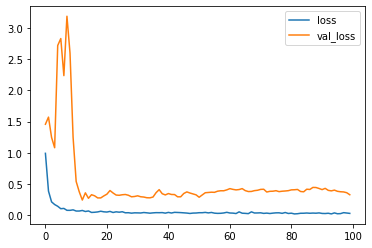

epochs =  99 loss =  0.028004396706819534 , val_loss =  0.32678595185279846
55/55 [==============================] - 8s 150ms/step - loss: 0.0280 - acc: 0.9885 - val_loss: 0.3268 - val_acc: 0.9588


In [27]:
plot_losses = PlotLosses()
history = model.fit(train_x, train_y, epochs=100, verbose=1, validation_split=0.1, batch_size=16,
                    callbacks=[plot_losses])



In [28]:
print("loss = ", history.history['loss'][-1], ", val_loss = ", history.history['val_loss'][-1], 
      "acc = ", history.history['acc'][-1], ", val_acc = ", history.history['val_acc'][-1])

# plt.plot(history.history['loss'])
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_loss'])
# plt.plot(history.history['val_acc'])
# plt.show()

loss =  0.028004396706819534 , val_loss =  0.32678595185279846 acc =  0.988452672958374 , val_acc =  0.9587628841400146


8/8 [==============================] - 1s 73ms/step - loss: 0.4364 - acc: 0.9419
loss= 0.4364001154899597
acc= 0.9419087171554565


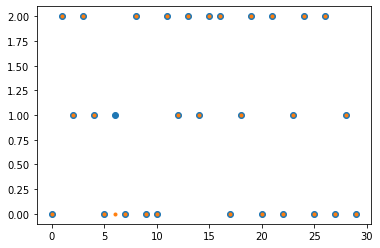

In [29]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y[:30], 'o')
plt.plot(predicted[:30], '.')
plt.show()


In [ ]:
model.save('../gdrive/MyDrive/Audio/ganada_B.h5')